In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [20]:
def get(h1, i):
    return cPickle.load(open('sjostrom_switch_fit_h1_{0}_i_{1}.p'.format(h1, i),'rb'))

h1_s = [str(a) for a in [False, True]]
i_s = [str(a) for a in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


params = list(product(h1_s, i_s))

data = {tup:get(*tup) for tup in params}

In [21]:
sjo_l2 = loadtxt('.././experimental_data/sjo_switch_L23.csv',delimiter=',')
sjo_l5 = loadtxt('.././experimental_data/sjo_switch_L5.csv',delimiter=',')
sjo_ext = loadtxt('.././experimental_data/sjo_switch_extrac.csv',delimiter=',')
print sjo_l2.shape[0]+sjo_l5.shape[0]+sjo_ext.shape[0]

71


## Fits to experiments

### experimental data

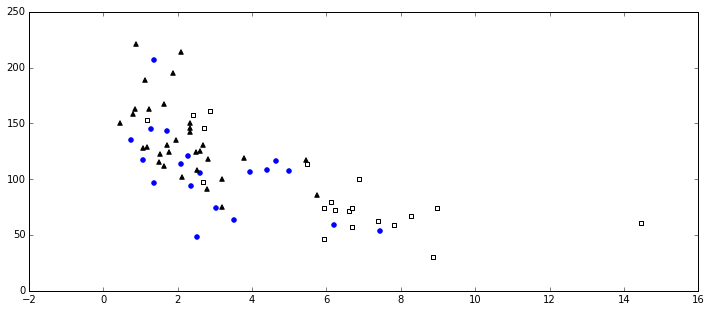

In [22]:
figure(figsize=(12,5))
scatter(sjo_l2[:,0],sjo_l2[:,1],marker='o',color='blue')
scatter(sjo_l5[:,0],sjo_l5[:,1],marker='^',color='black')
scatter(sjo_ext[:,0],sjo_ext[:,1],marker='s',facecolors='white',edgecolors='black')

In [23]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

### fit

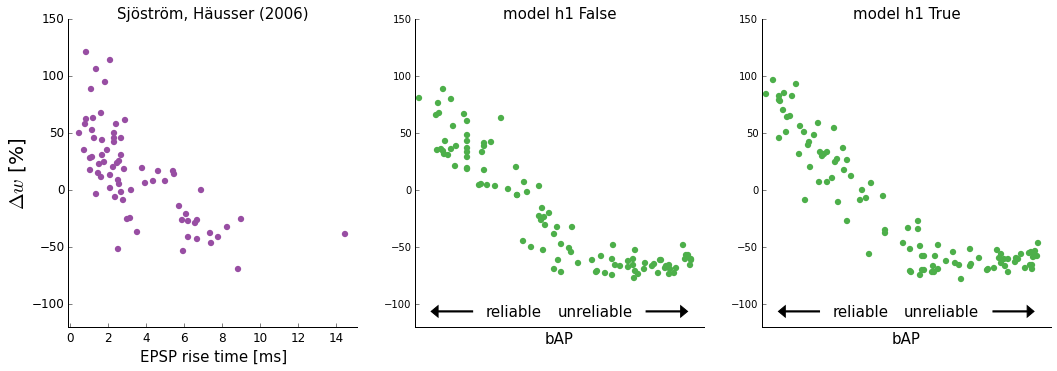

In [24]:
figure(figsize=(15,5))
ax=subplot(1,3,1)
scatter(sjo_l2[:,0],sjo_l2[:,1]-100,s=40,lw=0,color='#984ea3')
scatter(sjo_l5[:,0],sjo_l5[:,1]-100,s=40,lw=0,color='#984ea3')
scatter(sjo_ext[:,0],sjo_ext[:,1]-100,s=40,lw=0,color='#984ea3')
simpleaxis(gca())
xticks(xticks()[0],fontsize=12)
yticks(yticks()[0],fontsize=12)
title(u'Sjöström, Häusser (2006)',fontsize=15,verticalalignment='center',horizontalalignment='center')
xlim([-0.1,15.1])
ylabel('$\Delta w$ [%]',fontsize=20)
xlabel('EPSP rise time [ms]',fontsize=15)
ylim([-120,150])

for idx, h1 in enumerate(h1_s):
    subplot(1,3,idx+2)
    dws = []
    ps = []
    for i in i_s:
        curr = data[(h1, i,)]
        p = curr[0]
        ps.append(p)
        acc = curr[1][0]
        dws.append(acc.res['weights'][-1]/acc.res['weights'][0])
    scatter(1-array(ps), 100*array(dws)-100, c='#4daf4a',lw=0,s=40)
    xlim([min(1-array(ps))*.97,max(1-array(ps))*1.03])
    ylim([-120,150])
    simpleaxis(gca())
    xticks([])
    title(u'model h1 {0}'.format(h1),fontsize=15,verticalalignment='center',horizontalalignment='center')
    yl, xl = ylim(), xlim()
    yr, xr = yl[1]-yl[0], xl[1]-xl[0]
    gca().arrow(xl[0]+0.2*xr, yl[0]+0.05*yr, -0.05, 0, head_width=10, head_length=0.01, fc='k', ec='k',width=1)
    gca().arrow(xl[0]+0.8*xr, yl[0]+0.05*yr, 0.05, 0, head_width=10, head_length=0.01, fc='k', ec='k',width=1)
    text(xl[0]+0.25*xr, yl[0]+0.05*yr,'reliable',verticalalignment='center',horizontalalignment='left',fontsize=15)
    text(xl[0]+0.75*xr, yl[0]+0.05*yr,'unreliable',verticalalignment='center',horizontalalignment='right',fontsize=15)
    xlabel('bAP',fontsize=15)
    subplots_adjust(left=0.08,top=0.98,right=0.99)

## Sensitivity analysis

In [25]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [26]:
def get_vary(vary, ivary, h1, i):
    return cPickle.load(open('sjostrom_switch_vary_vary_{0}_ivary_{1}_h1_{2}_i_{3}.p'.format(vary, ivary, h1, i),'rb'))

vary_s = ["alpha", "beta", "r_max"]
ivary_s = map(str, range(3))

h1_s = map(str, [False, True])
i_s = map(str,range(50))


params_vary = list(product(vary_s, ivary_s, h1_s, i_s))

data_vary = {tup:get_vary(*tup) for tup in params_vary}

In [27]:
import random
r = lambda: random.randint(0,255)
colors = ['#%02X%02X%02X' % (r(),r(),r()) for _ in range(5)]
print colors

['#A233DC', '#FE1E9F', '#5F3E0D', '#A93921', '#7AE39A']


In [28]:
def show_plot(vary, h1):
    for ivary in [ivary_s[0], ivary_s[-1]] + ivary_s[1:-1]:
        dws = []
        ps = []
        for i in i_s:
            p = (vary, ivary, h1, i)
            curr = data_vary[p]
            p = curr[0]
            ps.append(p)
            acc = curr[1][0]
            dws.append(acc.res['weights'][-1]/acc.res['weights'][0])
        scatter(1-array(ps), 100*array(dws)-100, c=colors[int(ivary)],lw=0,s=40)
    ylabel('percent change', fontsize=15)
    xlabel('$p_{fail}$',fontsize=15)


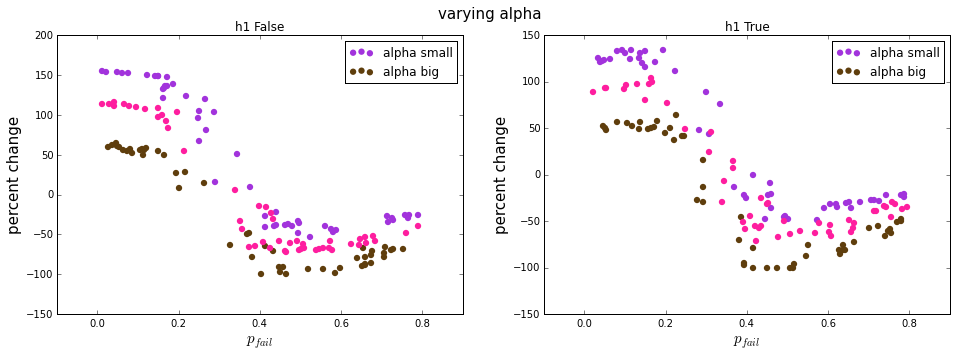

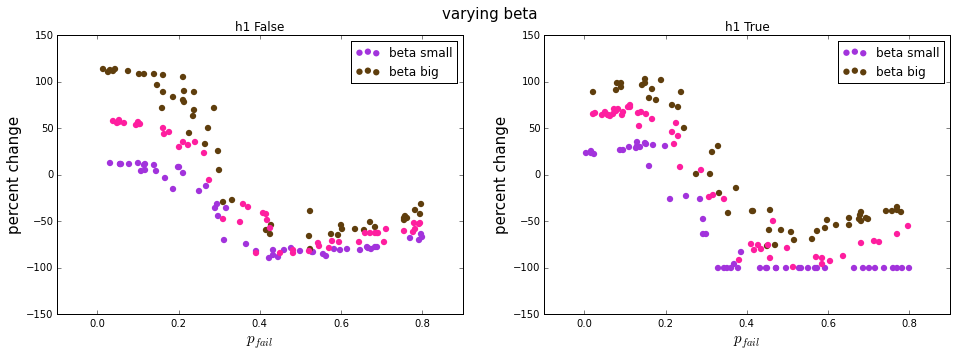

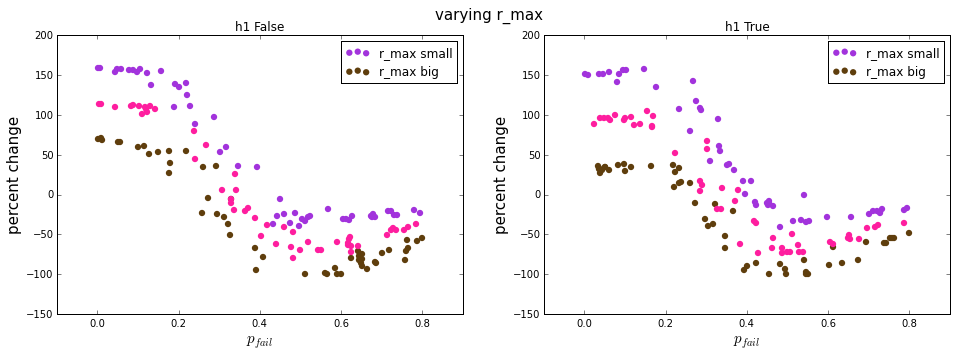

In [29]:
for vary in vary_s:
    figure(figsize=(16,5))
    for idx, h1 in enumerate(h1_s):
        subplot(1,2,idx+1)
        show_plot(vary,h1)
        title('h1 {0}'.format(h1))
        legend(['{0} small'.format(vary), '{0} big'.format(vary)])
    suptitle('varying {0}'.format(vary), fontsize=15)

### interactive

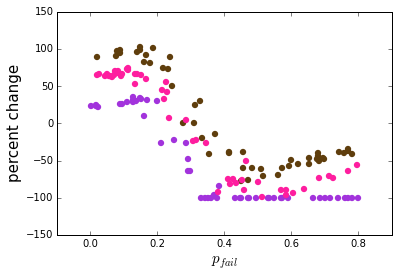

In [30]:
ts = data[params[0]][1][0].t
i = interact(show_plot,
vary=widgets.ToggleButtons(description='vary',options=vary_s),
h1=widgets.ToggleButtons(description='h1',options=h1_s))
